# Goal of project:
<ul>
    <li> Perform EDA on the dataset - clean dataset</li>
<li> Look at age of patients</li>
<li> Look at relationship of HPV diagnosis vs cervical cancer</li>
<li> Look at relationship of smoking vs cervical cancer</li>
</ul>

#### Machine learning goals:
- use datacamp to inform. K nearest neighbours model of labelled data
##### Possible steps: 
Perform unsupervised learning project - if you have a population of women of various ages, how to select whom to contact for HPV test? as categories are surely closely related.

#dataset source: <a href = "https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29">UCI ML Repository</a> and <a href = "https://sci-hub.yncjkj.com/10.1007/978-3-319-58838-4_27">SciHub</a>. 2017


### Wordbank:
 - condylomatosis: _manifestation of infection caused by the human papilloma virus (warts)_
 - DX: _diagnosis_
 - CIN: _Cervical intraepithelial neoplasia is the abnormal growth of cells on the surface of the cervix_
 - Hinselmann: _a test method for cervical cancer by examining the cells on an instrument called colposcope_
 - Biopsy: _collection of cells for examination_
 - Schiller: _test which applies iodine to the cervix. Brown iodine: indicates of healthy cells. white or yellow color: indicates abnormal cells_ 
 - Citology(sic): _Cytology in this context is a cervical cell taken from Pap-smear examination under a microscope_

In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

pd.set_option('display.max_columns',40)

In [2]:
df = pd.read_csv("datasets/risk_factors_cervical_cancer.csv")

In [3]:
length = len(df)
col_names = df.columns
col_length = len(col_names)

In [4]:
print("Length of dataframe is {}. Number of columns is {}".format(length, col_length))

Length of dataframe is 858. Number of columns is 36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Missing values. What are they represented as?

In [6]:
df.head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


They are represented as question marks.

In [7]:
print(df['STDs: Time since first diagnosis'].unique())
print(df['STDs: Time since last diagnosis'].unique())

['?' '21.0' '2.0' '15.0' '19.0' '3.0' '12.0' '1.0' '11.0' '9.0' '7.0'
 '8.0' '16.0' '6.0' '5.0' '10.0' '4.0' '22.0' '18.0']
['?' '21.0' '2.0' '15.0' '19.0' '3.0' '12.0' '1.0' '11.0' '9.0' '7.0'
 '8.0' '16.0' '6.0' '5.0' '10.0' '4.0' '22.0' '18.0']


The above lists show that there are still values in the NaN columns. I can impute data to these columns: if 'STDs: Number of diagnosis' == 0, then logically both of the above columns will also be 0.

In [8]:
#check that this is true
amt_false = 0
for x in range(len(df)):
    if df['STDs: Number of diagnosis'][x] == 0:
        #print(df[['STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis']])
        if df['STDs: Time since first diagnosis'][x] != '?':
            if df['STDs: Time since last diagnosis'][x] != '?':
                amt_false += 1
            else:
                pass
        else: pass
    else:
        pass
print(amt_false)

0


That amt_false = 0 after the loop, it shows that no clients with # STD diagnosis = 0 have any values in the later columns. Hence I can add value 0 to both of those columns.

In [9]:
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].replace('?', np.NaN)
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].replace('?', np.NaN)

In [10]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


now I noticed a ? in 'first sexual intercourse' column. How many rows have '?' in this column?

In [11]:
df['First sexual intercourse'].value_counts(normalize = True) #this shows all the entries, and gives a normalised value of each entry.

15.0    0.189977
17.0    0.175991
18.0    0.159674
16.0    0.141026
14.0    0.092075
19.0    0.069930
20.0    0.043124
13.0    0.029138
21.0    0.023310
23.0    0.010490
22.0    0.010490
?       0.008159
26.0    0.008159
12.0    0.006993
27.0    0.006993
24.0    0.006993
29.0    0.005828
28.0    0.003497
11.0    0.002331
25.0    0.002331
10.0    0.002331
32.0    0.001166
Name: First sexual intercourse, dtype: float64

From the above we can see only 0.8 % of entries are '?'. I will impute (by mode) these values from the remainder. I chose mode (most_frequent) as there are some outliers. 

In [12]:
df = df.replace('?', np.NaN) #all '?' replaced with NaN

imp = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
df['First sexual intercourse'] = imp.fit_transform(df[['First sexual intercourse']]).ravel()

however, in some rows, undoubtably now 'first sexual intercourse' is a larger # than 'age' which is impossible. 
so, a quick loop for cells where df['First sexual intercourse'] > df['Age'], where if true, the former is replaced with the 
latter.

help guides:
 - <a href= 'https://stackoverflow.com/questions/49805945/scikit-learn-impute-values-in-a-specific-column'>Scikit learn impute values in a specific column</a>
 - <a href = 'https://stackoverflow.com/questions/59439096/importerror-cannnot-import-name-imputer-from-sklearn-preprocessing'>Import error in imputer</a>

In [15]:
#a review of the dataframe shows that modal 'first sexual intercourse' is 15.
#Have any rows where age > 15 had 15 appended to the 'first sexual intercourse' column?
for x in range(len(df)):
    if df['Age'][x] > 15:
        if df['First sexual intercourse'][x] == 15:
            df['First sexual intercourse'][x].replace('15', df['Age'][x])

In [16]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


Update the dtypes to be as per Attribute Information on the source page:
 - int:
  - Age
   - Number of sexual partners
   - First sexual intercourse (age) 
   - Num of pregnancies
   - IUD (years)
   - STDs (number)
   - STDs: Time since first diagnosis
   - STDs: Time since last diagnosis
 - bool: 
  - Smokes
  - Hormonal Contraceptives 
  - IUD
  - STDs
  - STDs:condylomatosis 
  - STDs:cervical condylomatosis 
  - STDs:vaginal condylomatosis 
  - STDs:vulvo-perineal condylomatosis
  - STDs:syphilis
  - STDs:pelvic inflammatory disease 
  - STDs:genital herpes
  - STDs:molluscum contagiosum 
  - STDs:AIDS 
  - STDs:HIV
  - STDs:Hepatitis B
  - STDs:HPV
  - Dx:Cancer 
  - Dx:CIN 
  - Dx:HPV 
  - Dx Hinselmann: target variable 
  - Schiller: target variable 
  - Cytology: target variable 
  - Biopsy: target variable

I disagree with some categories, eg Smokes (years) shouldn't be a boolean, so here are some deviant dtypes:
 - float:
  - IUD (years) 
  - Hormonal Contraceptives (years)
  - Smokes (years)

I will delete row 'Smokes (packs/year)' as the results are so variable. 

In [17]:
#df.dtypes
df = df.drop(columns = 'Smokes (packs/year)')
#df.head()

For each col, assess for NaN, impute values, and then readjust to target dtype

In [18]:
post_impute = list()

def impute_mode_to_type_int(dataframe, column):
    """
    dataframe = df, with missing values as np.NaN
    column = column name as string
    
    take a column of the dataframe. 
    Impute the modal value.
    Replace NaN with modal value.
    """
    pre_impute = dataframe[column].unique()
    
    imp = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
    dataframe[column] = imp.fit_transform(dataframe[[column]]).ravel()

    
    dataframe[column] = dataframe[column].astype(float)
    dataframe[column] = dataframe[column].astype(int)
    post_impute = dataframe[column].unique()
    
    print("Column imputed:", column)
    print(post_impute)

In [19]:
type_int_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'STDs (number)', 
                 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

In [20]:
for column in type_int_cols:
    impute_mode_to_type_int(df, column)

Column imputed: Age
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Column imputed: Number of sexual partners
[ 4  1  5  3  2  6  7 15  8 10 28  9]
Column imputed: First sexual intercourse
[15 14 16 21 23 17 26 20 25 18 27 19 24 32 13 29 11 12 22 28 10]
Column imputed: Num of pregnancies
[ 1  4  2  6  3  5  8  7  0 11 10]
Column imputed: STDs (number)
[0 2 1 3 4]
Column imputed: STDs: Number of diagnosis
[0 1 3 2]
Column imputed: STDs: Time since first diagnosis
[ 1 21  2 15 19  3 12 11  9  7  8 16  6  5 10  4 22 18]
Column imputed: STDs: Time since last diagnosis
[ 1 21  2 15 19  3 12 11  9  7  8 16  6  5 10  4 22 18]


In [21]:
def impute_mode_to_type_float(dataframe, column):
    """
    dataframe = df, with missing values as np.NaN
    column = column name as string
    
    take a column of the dataframe. 
    Impute the modal value.
    Replace NaN with modal value.
    update datatype to type float
    """
    pre_impute = dataframe[column].unique()
    
    imp = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
    dataframe[column] = imp.fit_transform(dataframe[[column]]).ravel()
    
    dataframe[column] = dataframe[column].astype(float)
    dataframe[column] = round(dataframe[column], 2)
    post_impute = dataframe[column].unique()
    
    print("Column imputed:", column)
    print(post_impute)

In [22]:
type_float_cols = ['Hormonal Contraceptives (years)', 'IUD (years)', 'Smokes (years)']

In [23]:
for column in type_float_cols:
    impute_mode_to_type_float(df, column)

Column imputed: Hormonal Contraceptives (years)
[ 0.    3.   15.    2.    8.   10.    5.    0.25  7.   22.   19.    0.5
  1.    0.58  9.   13.   11.    4.   12.   16.    0.33  0.16 14.    0.08
  2.28  0.66  6.    1.5   0.42  0.67  0.75  2.5   4.5   6.5   0.17 20.
  3.5   0.41 30.   17.  ]
Column imputed: IUD (years)
[ 0.    7.    5.    8.    6.    1.    0.58  2.   19.    0.5  17.    0.08
  0.25 10.   11.    3.   15.   12.    9.    1.5   0.91  4.    0.33  0.41
  0.16  0.17]
Column imputed: Smokes (years)
[ 0.   37.   34.    1.27  3.   12.   18.    7.   19.   21.   15.   13.
 16.    8.    4.   10.   22.   14.    0.5  11.    9.    2.    5.    6.
  1.   32.   24.   28.   20.    0.16]


In [24]:
def impute_mode_to_type_bool(dataframe, column):
    """
    dataframe = df, with missing values as np.NaN
    column = column name as string
    
    take a column of the dataframe. 
    Impute the modal value.
    Replace NaN with modal value.
    update datatype to type float
    """
    pre_impute = dataframe[column].unique()
    
    imp = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
    dataframe[column] = imp.fit_transform(dataframe[[column]]).ravel()
    
    dataframe[column] = dataframe[column].astype(float)
    dataframe[column] = dataframe[column].astype(int)
    dataframe[column] = dataframe[column].astype(bool)
    post_impute = dataframe[column].unique()
    
    print("Column imputed:", column)
    print(post_impute)

In [25]:
type_bool_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 
                 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                 'Citology', 'Biopsy']

In [26]:
for column in type_bool_cols:
    impute_mode_to_type_bool(df, column)

Column imputed: Smokes
[False  True]
Column imputed: Hormonal Contraceptives
[False  True]
Column imputed: IUD
[False  True]
Column imputed: STDs
[False  True]
Column imputed: STDs:condylomatosis
[False  True]
Column imputed: STDs:cervical condylomatosis
[False]
Column imputed: STDs:vaginal condylomatosis
[False  True]
Column imputed: STDs:vulvo-perineal condylomatosis
[False  True]
Column imputed: STDs:syphilis
[False  True]
Column imputed: STDs:pelvic inflammatory disease
[False  True]
Column imputed: STDs:genital herpes
[False  True]
Column imputed: STDs:molluscum contagiosum
[False  True]
Column imputed: STDs:AIDS
[False]
Column imputed: STDs:HIV
[False  True]
Column imputed: STDs:Hepatitis B
[False  True]
Column imputed: STDs:HPV
[False  True]
Column imputed: Dx:Cancer
[False  True]
Column imputed: Dx:CIN
[False  True]
Column imputed: Dx:HPV
[False  True]
Column imputed: Dx
[False  True]
Column imputed: Hinselmann
[False  True]
Column imputed: Schiller
[False  True]
Column imputed

Now, we will check the first 20 entries of the dataframe.

In [27]:
df.head(20)
#df.isnull().values.any() 
#df.isnull().sum()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,False,0.00,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
1,15,1,14,1,False,0.00,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
2,34,1,15,1,False,0.00,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
3,52,5,16,4,True,37.00,True,3.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,False,False,False,False,False
4,46,3,21,4,False,0.00,True,15.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
5,42,3,23,2,False,0.00,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
6,51,3,17,6,True,34.00,False,0.00,True,7.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,True,True,False,True
7,26,1,26,3,False,0.00,True,2.00,True,7.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
8,45,1,20,5,False,0.00,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,False,False,False,False
9,44,3,15,1,True,1.27,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int32  
 1   Number of sexual partners           858 non-null    int32  
 2   First sexual intercourse            858 non-null    int32  
 3   Num of pregnancies                  858 non-null    int32  
 4   Smokes                              858 non-null    bool   
 5   Smokes (years)                      858 non-null    float64
 6   Hormonal Contraceptives             858 non-null    bool   
 7   Hormonal Contraceptives (years)     858 non-null    float64
 8   IUD                                 858 non-null    bool   
 9   IUD (years)                         858 non-null    float64
 10  STDs                                858 non-null    bool   
 11  STDs (number)                       858 non-n

Task 2: Look at the age of respondents.

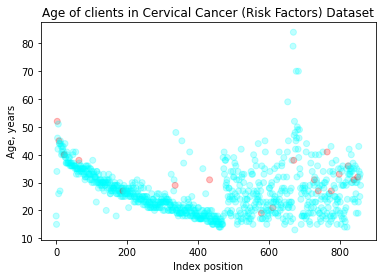

In [63]:
colours = {True : 'red', False : '#00FFFF'}

plt.scatter(df.index, df['Age'], alpha = 0.25, c = df['Dx:Cancer'].map(colours))

plt.xlabel('Index position')
plt.ylabel('Age, years')
plt.title('Age of clients in Cervical Cancer (Risk Factors) Dataset')

plt.show()

In [64]:
mean_age= round(np.mean(df['Age']), 2)
median_age = np.median(df['Age'])
modal_age = int(stats.mode(df['Age'])[0])

In [65]:
print("{} is the mean age of clients in the dataset, {} is the median age, {} is the modal age.".format(mean_age, median_age, modal_age))

26.82 is the mean age of clients in the dataset, 25.0 is the median age, 23 is the modal age.


In [66]:
ages = np.array(df['Age'])
q3, q1 = np.percentile(ages, [75, 25])
iqr = q3 - q1
print("{} is the interquartile range, meaning the middle 50 % of respondents were between {} and {} years old.".format(iqr, (median_age - (iqr/2)), (median_age + (iqr/2))))

12.0 is the interquartile range, meaning the middle 50 % of respondents were between 19.0 and 31.0 years old.


In [67]:
#I want to order the above by age, then re-examine data in the same way.
sorted_age = df.sort_values('Age')
sorted_age = sorted_age.reset_index(drop =  True)
sorted_age

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,13,1,13,0,False,0.0,False,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
1,14,1,14,1,False,0.0,True,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
2,14,5,16,1,False,0.0,True,0.08,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
3,14,2,14,1,False,0.0,False,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
4,14,2,14,1,False,0.0,True,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,59,2,13,1,False,0.0,False,0.00,True,0.41,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,True,False,True,False,False,False,False
854,70,4,27,3,True,3.0,False,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
855,70,1,16,10,False,0.0,False,0.00,True,3.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False
856,79,2,16,5,False,0.0,False,0.00,False,0.00,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,False,False,False,False,False,False,False,False


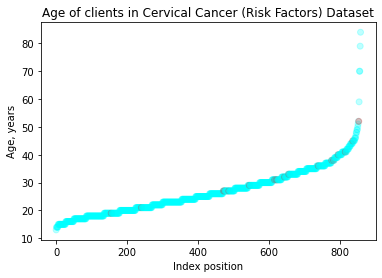

In [68]:
plt.scatter(sorted_age.index, sorted_age['Age'], alpha = 0.25, c = sorted_age['Dx:Cancer'].map(colours))

plt.xlabel('Index position')
plt.ylabel('Age, years')
plt.title('Age of clients in Cervical Cancer (Risk Factors) Dataset')

plt.show()

In [71]:
#graph shows (poorly) that Dx:Cancer occurs over a range of ages.
cerv_cancer_pos = df.loc[df['Dx:Cancer'] == True]
cerv_cancer_pos

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
3,52,5,16,4,True,37.0,True,3.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,False,False,False,False,False
8,45,1,20,5,False,0.0,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,False,False,False,False
23,40,1,20,2,False,0.0,True,15.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,False,True,True,False,True
64,38,2,15,4,False,0.0,True,16.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,False,False,True,False,True
188,27,5,19,2,False,0.0,True,3.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,False,False,True,False
335,29,2,18,4,False,0.0,False,0.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,False,True,True,True
432,31,3,19,1,False,0.0,False,0.00,True,7.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,False,True,False,False,False,False
578,19,1,18,1,False,0.0,True,1.00,False,0.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,True,True,True,True
610,21,2,18,3,False,0.0,False,0.00,True,3.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,True,True,False,True
669,38,3,22,2,False,0.0,True,3.00,True,6.0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,0,1,1,True,False,True,True,False,True,False,False


Look at links of Cervical cancer and HPV.

In [72]:
print("Of the {} clients in the survey:".format(length))
#of the Dx:
#how many clients are HPV pos?
df_HPV = df[df['Dx:HPV'] == True]
total_HPV_pos = len(df_HPV)
print("{} clients are HPV positive.".format(total_HPV_pos))

#how many clients are CIN pos?
df_CIN = df[df['Dx:CIN'] == True]
total_CIN_pos = len(df_CIN)
print("{} clients are CIN positive".format(total_CIN_pos))

#how many clients have cervical cancer?
df_Cancer = df[df['Dx:Cancer'] == True]
total_cancer_pos = len(df_Cancer)
print("{} clients have cervical cancer.".format(total_cancer_pos))

Of the 858 clients in the survey:
18 clients are HPV positive.
9 clients are CIN positive
18 clients have cervical cancer.


Are all of the cancer+ and hpv+ clients the same people?

In [74]:
df_HPV.index == df_Cancer.index

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

A lot of False. No, they are not all the same people.

In [76]:
HPV_Cancer = len(df_HPV[df_HPV['Dx:Cancer'] == True])
print("Of the {} clients who were HPV positive, {} of these also had cervical cancer.".format(total_HPV_pos, HPV_Cancer))

Of the 18 clients who were HPV positive, 16 of these also had cervical cancer.


In [77]:
Cancer_HPV = len(df_Cancer[df_Cancer['Dx:HPV'] == True])
print("Of the {} clients who were diagnosed with Cancer, {} were also HPV positive.".format(total_cancer_pos, Cancer_HPV))

Of the 18 clients who were diagnosed with Cancer, 16 were also HPV positive.


In [78]:
print(list(df_HPV.index))
print(list(df_Cancer.index))

[3, 8, 23, 64, 109, 188, 335, 372, 578, 610, 669, 727, 738, 763, 775, 797, 822, 849]
[3, 8, 23, 64, 188, 335, 432, 578, 610, 669, 727, 738, 763, 775, 797, 822, 839, 849]


Investigating links of smoking and cervical cancer

In [80]:
smokers = df[df['Smokes'] == True]
smokers = smokers.sort_values('Age')
smokers = smokers.reset_index(drop =  True)
 
total_smokers = len(smokers)
smokers_cancer = len(smokers[smokers['Dx:Cancer']])

print("Total amount of smokers: {}. This is {}% of the dataset. Of the {} clients who have cancer, {} were also smokers. This is {}% of cases.".format(total_smokers, round((total_smokers/length * 100), 1), total_cancer_pos, smokers_cancer, round(smokers_cancer/total_cancer_pos * 100), 1))

Total amount of smokers: 123. This is 14.3% of the dataset. Of the 18 clients who have cancer, 2 were also smokers. This is 11% of cases.


Plot of smokers, their age, coloured by Dx:Cancer yes or no

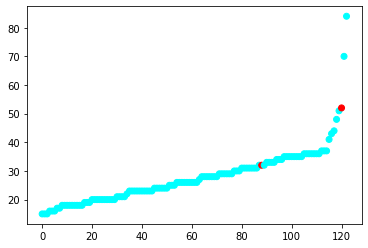

In [81]:
plt.scatter(smokers.index, smokers['Age'], c = smokers['Dx:Cancer'].map(colours))

plt.show()

#### Machine Learning: Regression with KNN

using Dx:Cancer True / False as my labels to be predicted, I will split the dataset and then perform KNN on the train + test data.

Help guides: 
- <a href = 'https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb'>link</a>
- <a href = 'https://gist.github.com/Amey23/b4e9eae22a8a46247d54215d9d3dc619#file-knn2-py'>link</a>
- <a href = 'https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/'>link</a>

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
y = df['Dx:Cancer'].values
X = df.drop('Dx:Cancer', axis = 1).values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 88)

In [87]:
num_k = 5
knn = KNeighborsClassifier(n_neighbors = num_k)

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred = knn.predict(X_test)

In [90]:
#assessing accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of this KNN model at n_neighbors = {} is {}.".format(num_k, accuracy))

Accuracy of this KNN model at n_neighbors = 5 is 0.9683098591549296.


could it be more accurate? Was 5 a lucky guess?
Please note, code below is taken from this link - <a href = 'https://gist.github.com/Amey23/656c1f1fb76308aee0e9102db78e6816'>'inquiring n_neighbors and how it impacts the accuracy'</a>.

Min error: 0.03169014084507042 at K =  2


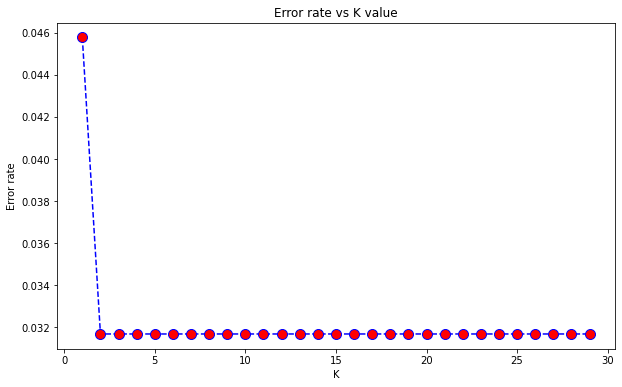

In [92]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize = (10, 6))    
plt.plot(range(1,30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print('Min error:', min(error_rate), "at K = ", error_rate.index(min(error_rate))+1)
plt.show()

In [93]:
print(error_rate)

[0.045774647887323945, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042, 0.03169014084507042]


above graph with the list of results - shows no improvement after K = 2!